## Medical Image Segmentation with YOLOv8
Medical image segmentation is a crucial process in many medical imaging applications.

It involves dividing or partitioning an image into multiple segments or “**regions of interest**” that correspond to different objects or parts of objects.

It processes visual data at the pixel level, using various techniques to annotate individual pixels as belonging to a specific class or instance

In the context of medical imaging, these could be various tissues, organs, cells, or anomalies like tumors.


### Importance of Medical Image Segmentation
Medical image segmentation plays a vital role in numerous biomedical applications, including:

1. **Disease Diagnosis and Monitoring**: It helps in the identification and visualization of anomalies or structures of interest in medical images, aiding in disease diagnosis and monitoring.
2. **Treatment Planning**: It provides critical information for planning treatment strategies, such as radiation therapy for cancer treatment.
3. **Computer-Aided Surgery**: It assists in pre-operative planning and
intra-operative navigation during surgical procedures.

### Applications of Medical Image Segmentation
1. **Tumor Detection**: It can help in the detection and localization of tumors in various parts of the body.
2. **Organ Delineation**: It can assist in delineating organs in medical images, which is crucial for surgical planning and organ transplantation.
3. **Blood Vessel Visualization**: It can aid in visualizing blood vessels in angiography images, which is essential for diagnosing and treating vascular diseases.
4. **Cell Counting and Classification**: It can help in counting and classifying cells in microscopic images, which is crucial in diagnosing diseases like cancer and monitoring treatment response.
5. **Fracture Identification**: It can assist in identifying and analyzing fractures, which is vital for treatment planning and monitoring the recovery process.

### YOLOv8 for Medical Image Segmentation
YOLOv8 (You Only Look Once version 8) is a state-of-the-art, real-time object detection system that can also be used for medical image segmentation. It can classify, detect, and segment objects in images, making it a versatile tool for medical image analysis.

Due to its high quality and real-time performance, YOLOv8 is highly effective when it comes to segmentation.


In [1]:
#install packages
!pip install ultralytics
!pip install -U ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.5/756.5 kB 20.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 57.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [3]:
import os
import random
import torch
import pandas as pd
import zipfile
import urllib.request
from ultralytics import YOLO
import matplotlib.pyplot as plt


url = "https://app.roboflow.com/ds/eHJfgHtWU6?key=oqtIXB35p3"

urllib.request.urlretrieve(url, "seg.zip")

print("File downloaded successfully!")





File downloaded successfully!


In [4]:
#create a directory to save contents of the zip file
!mkdir seg
!unzip seg.zip -d data/

Archive:  seg.zip
 extracting: data/README.dataset.txt  
 extracting: data/README.roboflow.txt  
 extracting: data/data.yaml          
   creating: data/test/
   creating: data/test/images/
 extracting: data/test/images/48_jpg.rf.84e3f13f4d70965ffd70fa0b1c6e42be.jpg  
 extracting: data/test/images/5_jpg.rf.b73e52a83456bf98cd02e104793d0326.jpg  
 extracting: data/test/images/61_jpg.rf.50ea7b8ecdd18e65d35bdf46d4935efe.jpg  
 extracting: data/test/images/7_jpg.rf.a5432c2b1ba85379e5b963c23b32a5ee.jpg  
 extracting: data/test/images/80_jpg.rf.d65c4f383e3b3f61e996dbc033e403fa.jpg  
 extracting: data/test/images/84_jpg.rf.f093ba6457de336c968eba617d56fc12.jpg  
 extracting: data/test/images/8_jpg.rf.09b0688a8ff9fc302b5dbacdc7157774.jpg  
 extracting: data/test/images/93_jpg.rf.9916236e540f1f4db758dacbe94110b8.jpg  
 extracting: data/test/images/96_jpg.rf.fccf27574d26a97f5f5df8c071bc79c8.jpg  
 extracting: data/test/images/98_jpg.rf.4e609a990d4b4c5243eedb49539e0da7.jpg  
   creating: data/test/

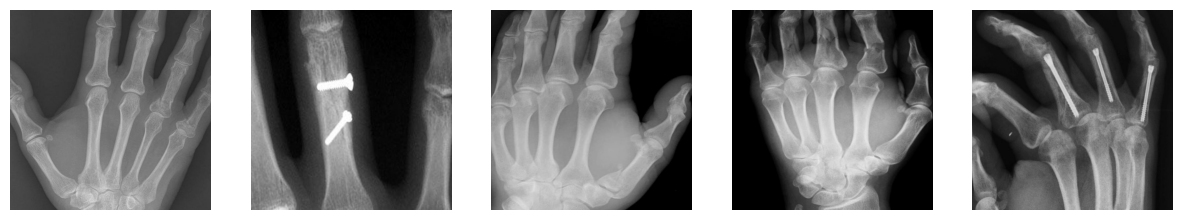

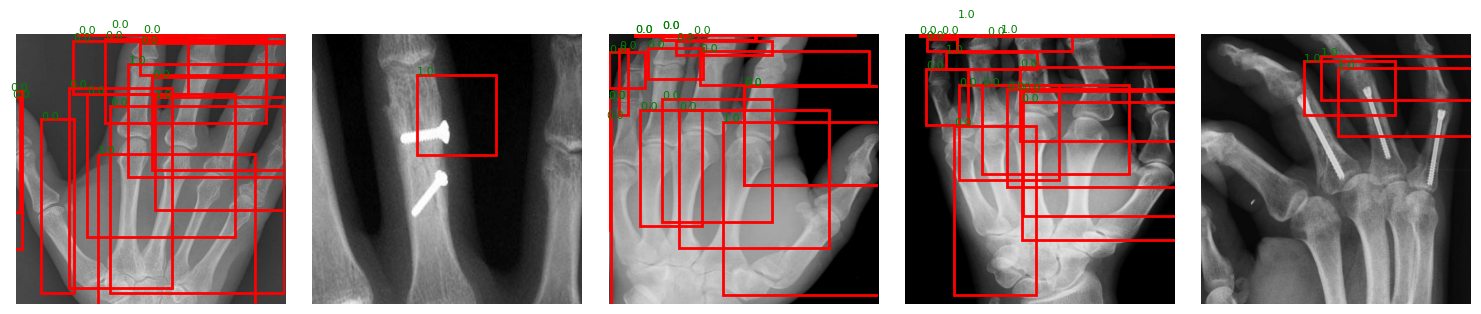

In [6]:
# Get the path of the extracted images
image_dir = "/kaggle/working/data/train/images"

# Get the path of the label files
label_dir = "/kaggle/working/data/train/labels"

# Get a list of all image file names
image_files = os.listdir(image_dir)

# Select 5 random images
random_images = random.sample(image_files, 5)

# Plot the random images without labels (row 1)
plt.figure(figsize=(15, 6))
for i, image_name in enumerate(random_images):
    image_path = os.path.join(image_dir, image_name)

    image = plt.imread(image_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.axis('off')

# Plot the random images with labels (row 2)
plt.figure(figsize=(15, 6))
for i, image_name in enumerate(random_images):
    image_path = os.path.join(image_dir, image_name)
    label_path = os.path.join(label_dir, image_name.replace(".jpg", ".txt"))

    image = plt.imread(image_path)
    plt.subplot(2, 5, i+6)
    plt.imshow(image)
    plt.axis('off')

    # Read the label file and draw bounding boxes
    with open(label_path, 'r') as f:
        labels = f.readlines()
    for label in labels:
        parts = list(map(float, label.strip().split()))
        if len(parts) < 5:
            print(f"Skipping label with less than 5 parts: {label}")
            continue
        class_id, x, y, w, h = parts[:5]
        x1 = int((x - w/2) * image.shape[1])
        y1 = int((y - h/2) * image.shape[0])
        x2 = int((x + w/2) * image.shape[1])
        y2 = int((y + h/2) * image.shape[0])
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(x1, y1, str(class_id), color='green', fontsize=8)

plt.tight_layout()
plt.show()


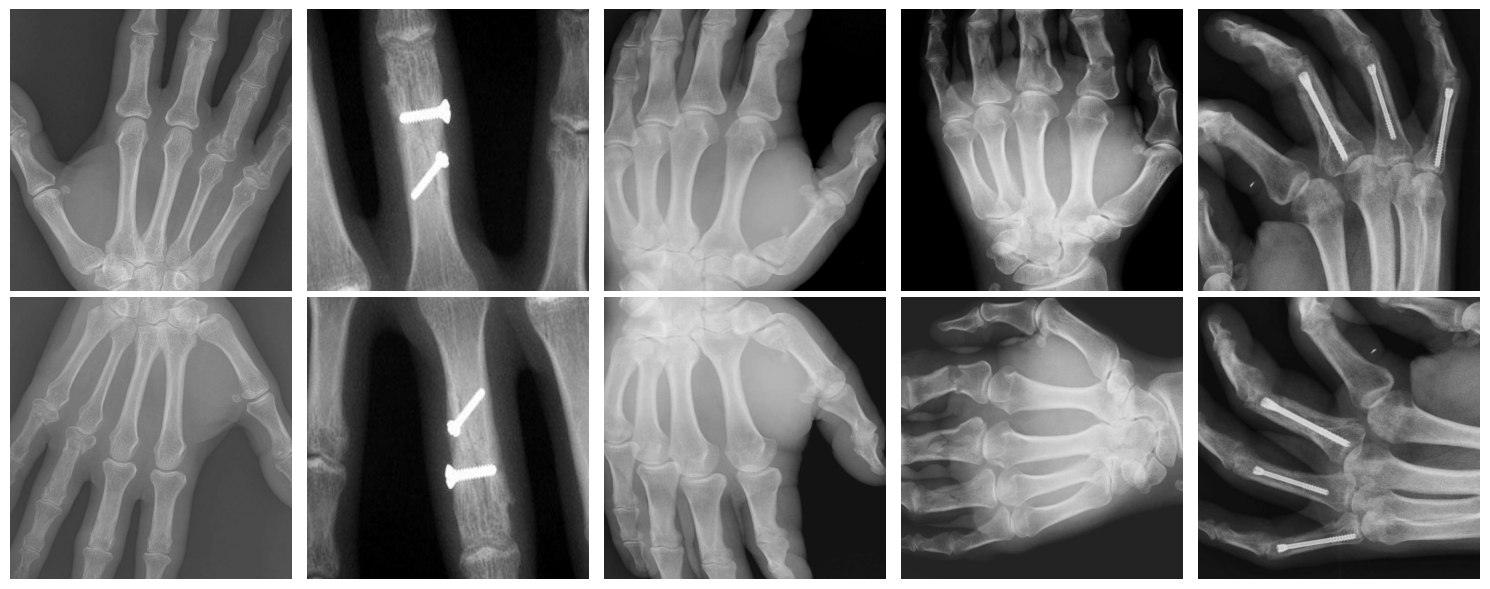

In [7]:
import albumentations as A

# Define the augmentation transforms
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomGamma(p=0.2),
])

# Plot the random images without labels and after segmentation
plt.figure(figsize=(15, 6))
for i, image_name in enumerate(random_images):
    image_path = os.path.join(image_dir, image_name)
    label_path = os.path.join(label_dir, image_name.replace(".jpg", ".txt"))

    # Read the image
    image = plt.imread(image_path)

    # Apply augmentation transforms
    augmented = transform(image=image)
    augmented_image = augmented["image"]

    # Plot the original image without labels
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.axis('off')

    # Plot the augmented image after segmentation
    plt.subplot(2, 5, i+6)
    plt.imshow(augmented_image)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Zero Shot Learning
Zero-Shot Learning (ZSL) is particularly relevant to image segmentation, including medical image segmentation. In traditional segmentation models, the model is trained to recognize and segment specific classes or categories present in the training data. However, these models may struggle when encountering new classes not seen during training.

This is where ZSL comes into play. In the context of segmentation, Zero-Shot Segmentation models are trained in such a way that they can segment objects or classes they have never seen before during training. This is achieved by leveraging auxiliary information that associates observed and non-observed classes.

###  Loading and Using the YOLOv8 Segmentation Model with Zero-Shot Learning

In this section, we will load the YOLOv8 segmentation model, which is capable of Zero-Shot Learning (ZSL). We will use it to perform segmentation on an image, including classes that the model has not seen during training. Finally, we will visualize the segmentation results.

Using device: cuda

image 1/1 /kaggle/working/data/train/images/204_jpg.rf.0a0393ed9a3b82467de8a9ec8b06a571.jpg: 640x640 1 vase, 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


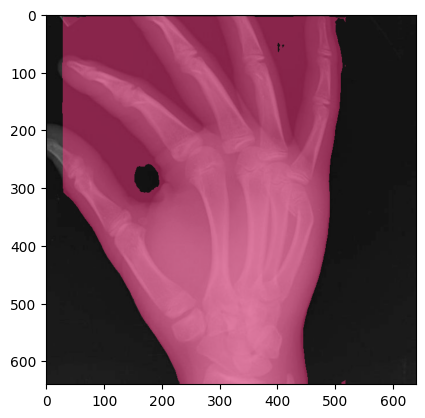

In [37]:
os.environ['WANDB_MODE'] = 'disabled'

# Check for CUDA device and set it
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')


# Load YOLOv8 segmentation model.nano
model = YOLO('yolov8n-seg.pt').to(device)

# Get the path of the image
image_path = "/kaggle/working/data/train/images/204_jpg.rf.0a0393ed9a3b82467de8a9ec8b06a571.jpg"

# Perform segmentation on the image
results = model(image_path)

# Visualize the results
plt.imshow(results[0].plot(boxes=False))
plt.show()

In [18]:
#Exercise

#Try doing zero shot segmentation for various YOLOv8 segmentation variants and note the differences i.e small, medium, large and extra large

### Fine-Tuning the YOLOv8 Segmentation Model
In this section, we will fine-tune the YOLOv8 segmentation model. Fine-tuning involves training a pre-existing model (a process also known as transfer learning) on a new task. It leverages the learned feature representations of the original model, which can lead to significant improvements in performance, especially when the new task is similar to the original one.

In [39]:
training = model.train(data='/kaggle/working/data/data.yaml', epochs=20, imgsz=256)

engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/kaggle/working/data/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=Fals

100%|██████████| 755k/755k [00:00<00:00, 23.1MB/s]
2024-05-09 04:47:19.003776: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 04:47:19.003889: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 04:47:19.186914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 116MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/train/labels... 432 images, 4 backgrounds, 0 corrupt: 100%|██████████| 432/432 [00:00<00:00, 837.38it/s]

train: WARNING ⚠️ /kaggle/working/data/train/images/112_jpg.rf.e55b6d48cbe88abded5d749855f194bd.jpg: 1 duplicate labels removed
train: New cache created: /kaggle/working/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/data/valid/labels... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 769.73it/s]

val: New cache created: /kaggle/working/data/valid/labels.cache


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/70      2.37G      3.371      4.641      3.653      2.644        288        256: 100%|██████████| 27/27 [00:22<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         26        206    0.00628      0.328    0.00588    0.00193   0.000668     0.0303   0.000366   4.35e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/70     0.898G       2.22      2.766      2.303      1.894        253        256: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         26        206      0.246       0.34      0.159     0.0616      0.203      0.282      0.113     0.0356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/70     0.906G      1.595      2.161        1.7      1.445        250        256: 100%|██████████| 27/27 [00:14<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         26        206      0.378      0.449       0.31      0.194      0.365      0.434      0.291      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/70     0.883G      1.348      1.881      1.498      1.297        198        256: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         26        206      0.286      0.513      0.356      0.242      0.279      0.503      0.342      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/70     0.902G      1.194      1.753      1.339      1.205        221        256: 100%|██████████| 27/27 [00:13<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         26        206      0.386        0.5      0.403      0.283      0.378      0.486       0.39      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/70     0.883G      1.129      1.703      1.329      1.167        235        256: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         26        206      0.436      0.538      0.409      0.291      0.428      0.524      0.393      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/70     0.927G      1.063      1.611       1.24      1.128        242        256: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         26        206      0.386      0.481      0.396       0.28      0.382      0.475      0.385      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/70       0.9G      1.028      1.569       1.22      1.104        249        256: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         26        206      0.413      0.508      0.423      0.307      0.408        0.5      0.404      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/70     0.925G     0.9758      1.528       1.18      1.076        172        256: 100%|██████████| 27/27 [00:13<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         26        206      0.489      0.544      0.445      0.326      0.405      0.513       0.42       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/70     0.963G     0.9176      1.386      1.168      1.067        298        256: 100%|██████████| 27/27 [00:13<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         26        206      0.398      0.621      0.454      0.345      0.375      0.593       0.43       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/70     0.919G     0.9424      1.406      1.103      1.046        181        256: 100%|██████████| 27/27 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         26        206      0.354      0.629      0.469      0.353      0.358      0.604      0.453      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/70     0.898G     0.8883      1.342      1.112      1.038        248        256: 100%|██████████| 27/27 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         26        206      0.499      0.544       0.46      0.343      0.481      0.544      0.435      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/70     0.904G     0.9079      1.396      1.113      1.028        242        256: 100%|██████████| 27/27 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         26        206      0.431      0.557      0.485      0.367      0.477      0.546      0.473       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/70     0.898G     0.8694      1.277      1.056      1.026        227        256: 100%|██████████| 27/27 [00:13<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         26        206      0.421      0.681      0.495      0.378      0.406      0.659       0.47      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/70     0.895G     0.8546      1.286      1.072      1.006        228        256: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         26        206      0.557      0.604      0.541      0.386      0.521      0.582      0.492       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/70     0.916G     0.8594      1.296      1.073      1.014        203        256: 100%|██████████| 27/27 [00:13<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         26        206      0.464      0.714      0.509      0.385      0.449      0.693       0.49      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/70     0.935G      0.836      1.261       1.02     0.9969        245        256: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         26        206      0.534      0.581      0.536      0.416      0.534      0.581      0.528      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/70     0.881G     0.8223      1.192      1.011     0.9889        185        256: 100%|██████████| 27/27 [00:15<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         26        206       0.54      0.642      0.518      0.383      0.487      0.631      0.478      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/70     0.914G     0.8189      1.259      1.006     0.9894        295        256: 100%|██████████| 27/27 [00:14<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         26        206      0.478      0.648      0.474      0.365      0.459      0.628      0.469      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/70     0.893G     0.8196      1.198     0.9856     0.9876        245        256: 100%|██████████| 27/27 [00:14<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         26        206      0.518      0.586      0.531      0.421      0.561      0.582      0.528      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/70      0.94G     0.7936      1.211      1.022     0.9811        310        256: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         26        206      0.523      0.614       0.51      0.394      0.523      0.614      0.504      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/70     0.925G     0.7929      1.177      0.979     0.9832        153        256: 100%|██████████| 27/27 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         26        206       0.57      0.698      0.583      0.468       0.57      0.698      0.586      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/70     0.925G     0.7961      1.182       0.99     0.9813        273        256: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         26        206      0.561      0.639      0.541      0.424      0.561      0.639      0.532      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/70     0.904G     0.7982      1.176     0.9863     0.9775        212        256: 100%|██████████| 27/27 [00:13<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         26        206      0.457      0.612      0.488      0.375      0.447       0.59      0.477      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/70     0.902G      0.773      1.155     0.9391      0.971        169        256: 100%|██████████| 27/27 [00:14<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         26        206      0.578      0.706      0.553      0.444      0.557      0.686      0.546        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/70     0.914G     0.7971      1.161     0.9878     0.9756        237        256: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         26        206      0.497      0.606      0.477      0.369      0.497      0.606      0.476      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/70     0.937G      0.783      1.181     0.9429     0.9709        233        256: 100%|██████████| 27/27 [00:13<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         26        206      0.511      0.653      0.485      0.385      0.509       0.65      0.467      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/70     0.942G     0.7749      1.157     0.9434     0.9657        237        256: 100%|██████████| 27/27 [00:14<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         26        206      0.502      0.694      0.538      0.414      0.502      0.694      0.533      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/70     0.944G     0.7759      1.132     0.9478     0.9695        146        256: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         26        206      0.514      0.564       0.48      0.378      0.514      0.564      0.477      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/70     0.963G     0.7557      1.106     0.9198      0.964        229        256: 100%|██████████| 27/27 [00:13<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         26        206      0.547      0.648      0.564      0.442      0.589      0.564      0.556      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/70     0.935G     0.7536      1.115     0.9383     0.9587        237        256: 100%|██████████| 27/27 [00:13<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         26        206      0.544      0.556      0.467      0.371      0.544      0.556      0.456      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/70     0.921G     0.7551      1.133     0.9106     0.9593        188        256: 100%|██████████| 27/27 [00:13<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         26        206      0.578      0.569      0.478      0.368      0.578      0.569      0.474      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/70      0.94G     0.7536      1.101     0.8845     0.9582        275        256: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         26        206      0.447      0.629      0.452      0.344      0.424      0.674      0.436      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/70       0.9G     0.7668       1.16     0.8947     0.9625        169        256: 100%|██████████| 27/27 [00:15<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         26        206      0.487      0.667      0.476      0.375      0.441      0.705      0.464      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/70     0.895G     0.7351      1.048      0.902      0.948        176        256: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         26        206      0.478      0.667      0.482      0.371      0.478      0.667      0.476       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/70     0.919G     0.7538       1.12     0.8887     0.9532        241        256: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         26        206      0.476      0.622      0.474      0.364      0.462       0.61      0.461      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/70     0.963G     0.7472      1.096     0.8619     0.9537        282        256: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         26        206       0.49      0.697      0.524       0.41      0.481      0.687      0.514      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/70     0.893G     0.7217      1.064     0.8558     0.9482        247        256: 100%|██████████| 27/27 [00:13<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         26        206      0.495      0.648       0.48      0.365      0.479      0.631      0.447      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/70     0.916G     0.7159      1.051     0.8375     0.9424        209        256: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         26        206      0.439       0.65      0.483      0.374       0.43      0.631      0.471      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/70     0.942G     0.7233      1.064     0.8723     0.9466        307        256: 100%|██████████| 27/27 [00:13<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         26        206      0.416      0.553      0.456      0.333      0.397      0.514      0.442      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/70     0.864G     0.7295       1.09     0.8749     0.9485        173        256: 100%|██████████| 27/27 [00:13<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         26        206      0.489      0.484      0.433      0.321      0.471      0.464      0.414      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/70     0.944G     0.7212      1.065     0.8507     0.9399        236        256: 100%|██████████| 27/27 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         26        206      0.465      0.707      0.474      0.374      0.458      0.692      0.466      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/70     0.902G     0.7066      1.022     0.8449     0.9398        244        256: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         26        206      0.451       0.62      0.465      0.361      0.443      0.595      0.451      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/70      0.96G     0.7405      1.095     0.8249     0.9459        183        256: 100%|██████████| 27/27 [00:13<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         26        206      0.525      0.504      0.498      0.395      0.497      0.501      0.486      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/70     0.916G      0.709      1.029      0.817     0.9315        225        256: 100%|██████████| 27/27 [00:15<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         26        206        0.5      0.634      0.507      0.388       0.48      0.613      0.483      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/70     0.914G     0.7277       1.05     0.8274     0.9355        231        256: 100%|██████████| 27/27 [00:13<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         26        206      0.455      0.492      0.403       0.31      0.453      0.488        0.4      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/70      0.96G     0.7264      1.023     0.8041     0.9351        247        256: 100%|██████████| 27/27 [00:15<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         26        206      0.457      0.514      0.442      0.345       0.46      0.513      0.432       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/70     0.902G     0.7172      1.059     0.8223     0.9402        226        256: 100%|██████████| 27/27 [00:13<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         26        206      0.436      0.587      0.411      0.314      0.422       0.54      0.389      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/70     0.912G     0.6976      1.031      0.825     0.9307        229        256: 100%|██████████| 27/27 [00:13<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         26        206      0.466      0.569      0.438       0.34      0.455      0.545      0.421      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/70     0.893G     0.7073      1.049     0.8159     0.9417        191        256: 100%|██████████| 27/27 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         26        206      0.442      0.558      0.471      0.366      0.582      0.434      0.453      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/70     0.942G     0.6997      1.024     0.8032     0.9303        230        256: 100%|██████████| 27/27 [00:14<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         26        206      0.489      0.522      0.476      0.364       0.57       0.44      0.468       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      52/70     0.919G      0.683     0.9796     0.8019     0.9302        265        256: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         26        206      0.469      0.635        0.5      0.391      0.471      0.599      0.496      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      53/70     0.923G     0.6886      1.007     0.7849     0.9308        244        256: 100%|██████████| 27/27 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         26        206      0.415      0.659      0.448      0.349      0.415      0.659      0.447      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      54/70     0.923G     0.6917      1.036     0.7743     0.9308        240        256: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         26        206      0.377      0.713      0.429      0.338      0.368      0.691      0.424      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      55/70     0.958G     0.7002      1.014     0.7767     0.9343        186        256: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         26        206      0.442      0.545      0.428      0.329      0.441      0.468      0.414      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      56/70     0.923G     0.6849      1.015     0.7969      0.932        262        256: 100%|██████████| 27/27 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         26        206      0.563      0.494      0.437      0.342      0.533      0.473      0.414      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      57/70     0.904G     0.6746      1.023     0.7671     0.9313        249        256: 100%|██████████| 27/27 [00:12<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         26        206      0.433      0.553       0.45      0.355       0.42      0.562      0.436       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/70     0.919G      0.688          1     0.7546     0.9315        171        256: 100%|██████████| 27/27 [00:13<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         26        206      0.419      0.491      0.402      0.309      0.385      0.457      0.384      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/70     0.927G     0.6893      1.014     0.7715     0.9276        224        256: 100%|██████████| 27/27 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         26        206      0.549      0.506      0.472      0.372      0.525      0.487      0.458      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/70     0.879G     0.6818      1.007     0.7576     0.9255        217        256: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         26        206      0.508      0.447      0.459      0.355      0.476      0.431      0.438      0.333


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      61/70     0.851G     0.6329     0.9327     0.7451      0.918        137        256: 100%|██████████| 27/27 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         26        206      0.465      0.528       0.46      0.354       0.44      0.509      0.441       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      62/70     0.875G     0.6264     0.9265     0.7162     0.9073        132        256: 100%|██████████| 27/27 [00:03<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         26        206      0.549       0.61      0.488      0.374      0.525      0.592      0.467      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      63/70     0.877G     0.5991     0.8953     0.6537     0.9017         96        256: 100%|██████████| 27/27 [00:03<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         26        206      0.433       0.52      0.439      0.343      0.418      0.501      0.427      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      64/70     0.898G     0.6126     0.8992     0.6333     0.9056        157        256: 100%|██████████| 27/27 [00:03<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


                   all         26        206      0.378      0.485      0.404      0.312      0.346      0.511      0.392      0.281

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      65/70     0.898G     0.5977     0.8874     0.6285     0.8998        132        256: 100%|██████████| 27/27 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         26        206      0.443      0.504      0.427      0.332      0.424       0.49      0.415      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      66/70     0.877G     0.6103     0.8947     0.6384     0.8981        154        256: 100%|██████████| 27/27 [00:03<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         26        206      0.444       0.52      0.446      0.347      0.427      0.501      0.428       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      67/70     0.895G     0.5998     0.8706     0.6197     0.8975        141        256: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         26        206      0.445      0.507      0.447      0.349       0.43      0.488      0.429      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      68/70     0.875G     0.6039      0.888     0.6425     0.9032        155        256: 100%|██████████| 27/27 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         26        206      0.478      0.451      0.417      0.325      0.428      0.437      0.398      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      69/70     0.893G     0.6107     0.8789     0.6462     0.9054        179        256: 100%|██████████| 27/27 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         26        206      0.458      0.493       0.45      0.348      0.442      0.473      0.427      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      70/70     0.833G     0.5849     0.8618     0.6013     0.8988        121        256: 100%|██████████| 27/27 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         26        206      0.473      0.497      0.464      0.356      0.456      0.478      0.437      0.315



70 epochs completed in 0.292 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.7MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.7MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


                   all         26        206      0.569      0.698      0.583      0.468      0.569      0.698      0.586      0.429
                     -         26        180      0.672      0.972      0.784      0.648      0.672      0.972      0.784      0.582
seg-2-full- - v10 2023-11-20 2-59pm         26         26      0.465      0.423      0.383      0.288      0.465      0.423      0.387      0.275
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/segment/train2


In [40]:
!ls

data  seg      yolov8l-seg.pt  yolov8n-seg.pt  yolov8s-seg.pt
runs  seg.zip  yolov8m-seg.pt  yolov8n.pt


                      epoch        train/box_loss        train/seg_loss  \
count             70.000000             70.000000             70.000000   
mean              35.500000              0.841006              1.229555   
std               20.351085              0.390637              0.516793   
min                1.000000              0.584940              0.861800   
25%               18.250000              0.693153              1.022075   
50%               35.500000              0.750395              1.098400   
75%               52.750000              0.821620              1.247000   
max               70.000000              3.371100              4.641100   

             train/cls_loss        train/dfl_loss  metrics/precision(B)  \
count             70.000000             70.000000             70.000000   
mean               0.975824              1.016337              0.460697   
std                0.417746              0.243458              0.084136   
min                0.601

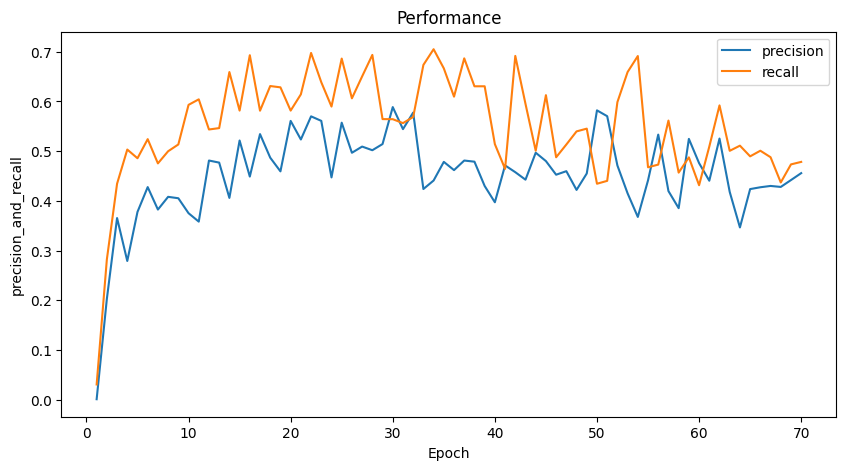

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your results file
df = pd.read_csv('/kaggle/working/runs/segment/train2/results.csv')

print(df.describe())

# Plotting the mAP value
plt.figure(figsize=(10, 5))

plt.plot(df['                  epoch'], df['   metrics/precision(M)'], label='precision')
plt.plot(df['                  epoch'], df['      metrics/recall(M)'], label='recall')


plt.xlabel('Epoch')
plt.ylabel('precision_and_recall')
plt.title('Performance')
plt.legend()
plt.show()

In [43]:
df.columns

Index(['                  epoch', '         train/box_loss',
       '         train/seg_loss', '         train/cls_loss',
       '         train/dfl_loss', '   metrics/precision(B)',
       '      metrics/recall(B)', '       metrics/mAP50(B)',
       '    metrics/mAP50-95(B)', '   metrics/precision(M)',
       '      metrics/recall(M)', '       metrics/mAP50(M)',
       '    metrics/mAP50-95(M)', '           val/box_loss',
       '           val/seg_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

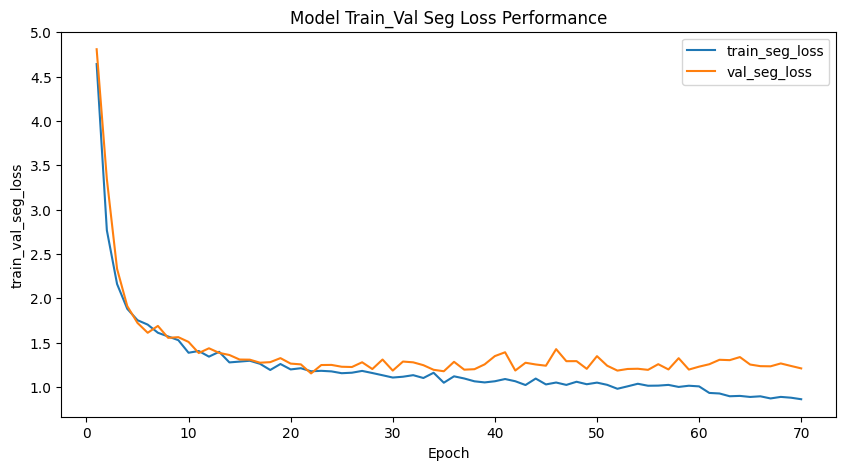

In [44]:
# Plotting the mAP value
plt.figure(figsize=(10, 5))
plt.plot(df['                  epoch'], df['         train/seg_loss'], label='train_seg_loss')
plt.plot(df['                  epoch'], df['           val/seg_loss'], label='val_seg_loss')
plt.xlabel('Epoch')
plt.ylabel('train_val_seg_loss')
plt.title('Model Train_Val Seg Loss Performance')
plt.legend()
plt.show()

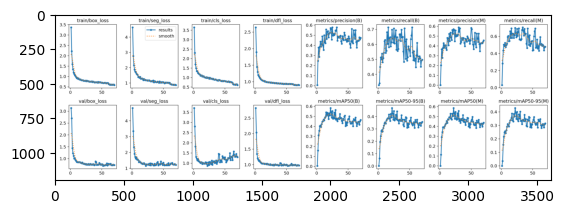

In [46]:
plt.imshow(plt.imread("/kaggle/working/runs/segment/train2/results.png"))

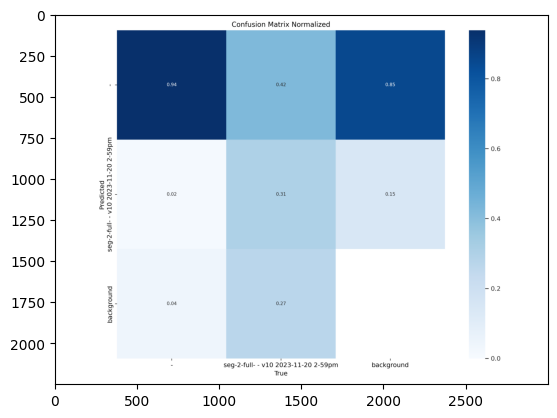

In [47]:
plt.imshow(plt.imread("/kaggle/working/runs/segment/train2/confusion_matrix_normalized.png"))

In [2]:
!yolo predict \
model='/kaggle/working/runs/segment/train2/weights/best.pt' \
source='/kaggle/working/data/test/images' \
name='yolov8s_predict' \
exist_ok=True \
save=True

/bin/bash: yolo: command not found


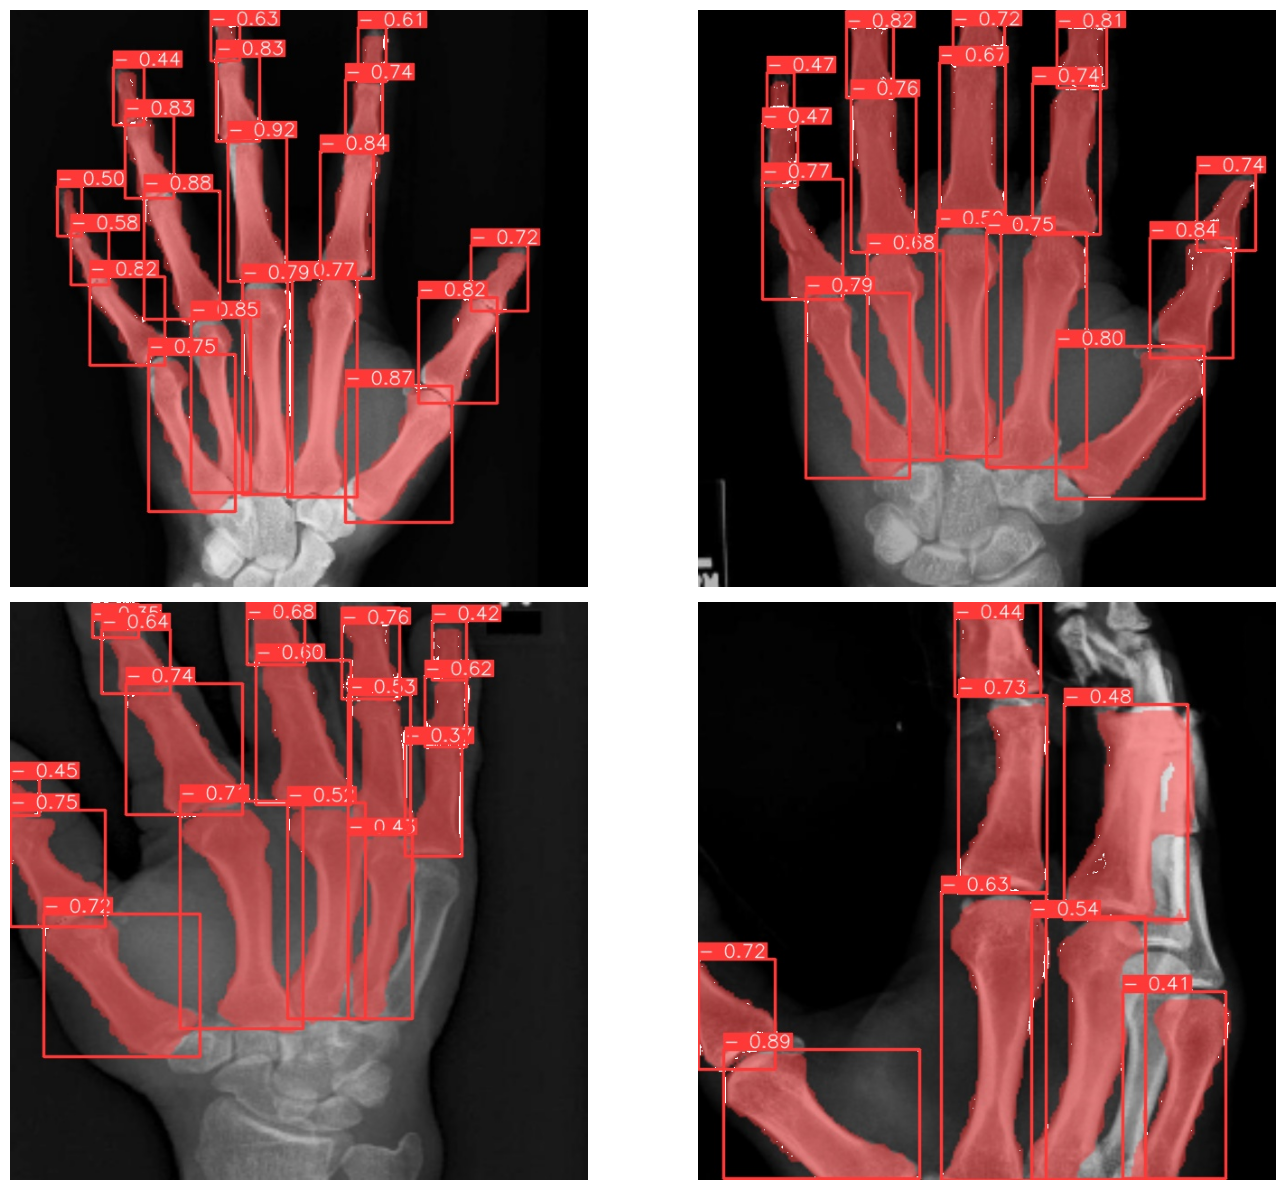

In [61]:
import glob
import os
import numpy as np

def visualize(result_dir):
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7))
        for i, image_name in enumerate(image_names):
            image = cv2.imread(image_name)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            red_lower = np.array([150, 0, 0], np.uint8)  # Lower range of red color
            red_upper = np.array([255, 50, 50], np.uint8)  # Upper range of red color
            red_mask = cv2.inRange(image, red_lower, red_upper)  # Create a mask for red color
            image[red_mask > 0] = [255, 255, 255]  # Change red color to white
            plt.subplot(1, 1, i+1)
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12))
        for i, image_name in enumerate(image_names):
            image = cv2.imread(image_name)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            red_lower = np.array([150, 0, 0], np.uint8)  # Lower range of red color
            red_upper = np.array([255, 50, 50], np.uint8)  # Upper range of red color
            red_mask = cv2.inRange(image, red_lower, red_upper)  # Create a mask for red color
            image[red_mask > 0] = [255, 255, 255]  # Change red color to white
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.axis('off')
            if i == 3:
                break
    plt.tight_layout()
    plt.show()
    
# visualize the segmentation results obtained from the inference run
visualize('/kaggle/working/runs/segment/yolov8s_predict')

# Exercise: Exploring YOLOv8 Segmentation Variants

In this exercise, you will experiment with different YOLOv8 segmentation variants, batch sizes, and epochs to observe their effects on the segmentation results.

1. **Segmentation Variants**: Try using different YOLOv8 segmentation variants such as 'yolov8s-seg', 'yolov8m-seg', 'yolov8l-seg', and 'yolov8x-seg'. Observe how the size and complexity of the model affect the segmentation results and computation time.

2. **Batch Sizes**: Experiment with different batch sizes. Start with a small batch size (e.g., 2 or 4), and gradually increase it (e.g., 8, 16, 32). Note how the batch size impacts the training speed and memory usage.

3. **Epochs**: Vary the number of epochs for training. Begin with a small number of epochs (e.g., 5 or 10) and gradually increase it (e.g., 20, 50, 100). Observe how the number of epochs affects the model's performance and overfitting.

Remember to record your observations and findings. This will help you understand the trade-offs involved and make informed decisions when fine-tuning models for your specific tasks. Happy experimenting!
